# DATA3406 - Week 9 Mini Assignment Process Notebook

### Importing our packages then reading in the data files

In [1]:
import pandas as pd
import numpy as np

In [2]:
courses = pd.read_excel("data/C4Courses.xlsx")
comments = pd.read_excel("data/C4Comments.xlsx")
groups = pd.read_excel("data/C4UsersCourses.xlsx")
questions = pd.read_excel("data/C4Questions.xlsx")
groups.head()

,user,course_id,Team
0,636031,21320,Black
1,635993,21320,Black
2,636008,21320,Black
3,636010,21320,Black
4,635988,21320,Black


### Lets merge the group and questions dataset to examine the question average rating and academic marks per group

In [3]:
team_questions = questions[['user','avg_rating', 'AcademicMark']].merge(groups[['user','Team']], on='user', how='inner')
team_questions.columns = [x.lower() for x in team_questions.columns]
team_questions.head()

,user,avg_rating,academicmark,team
0,635990,3.78,NaN,Brown
1,635990,3.75,5.0,Brown
2,636029,3.25,NaN,Pink
3,636029,0.00,NaN,Pink
4,636029,3.40,4.0,Pink


### What are the sizes of each team?

In [4]:
team_counts = team_questions.groupby('team', as_index=False)['user'].nunique()
team_counts.sort_values('user', ascending=False)

,team,user
3,Green,37
4,Pink,37
6,Red,37
2,Brown,36
0,Black,35
1,Blue,33
8,Yellow,31
7,White,23
5,Purple,15


### Now need to find the average question rating for each of these teams

In [5]:
team_questions

,user,avg_rating,academicmark,team
0,635990,3.78,NaN,Brown
1,635990,3.75,5.0,Brown
2,636029,3.25,NaN,Pink
3,636029,0.00,NaN,Pink
4,636029,3.40,4.0,Pink
...,...,...,...,...
531,637271,4.00,NaN,Brown
532,637271,4.00,4.0,Brown
533,637268,3.00,3.0,White
534,591275,4.00,NaN,White


In [6]:
counts = team_questions.groupby('team', as_index=False).mean()
team_counts['avg_rating'] = counts['avg_rating']
team_counts['avg_academic_mark'] = counts['academicmark']

In [7]:
team_counts.sort_values('user', ascending=False)

,team,user,avg_rating,avg_academic_mark
3,Green,37,3.087536,3.783784
4,Pink,37,2.986400,3.763158
6,Red,37,3.058750,3.842105
2,Brown,36,2.881053,3.447368
0,Black,35,2.974687,3.611111
1,Blue,33,3.160870,4.000000
8,Yellow,31,2.848500,3.580645
7,White,23,3.070000,4.041667
5,Purple,15,3.085806,4.058824


## Visualisations
Average rating by user count - does a larger team author better questions?

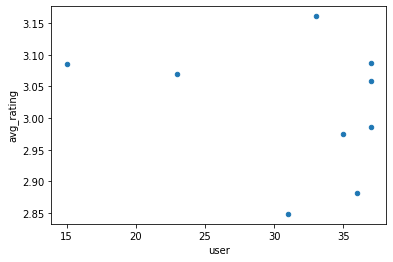

In [8]:
team_counts.plot.scatter(x='user', y='avg_rating')

### Average academic mark by user count - does a larger team get better marks?

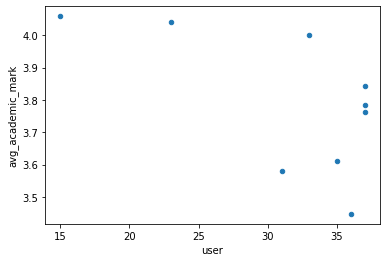

In [9]:
team_counts.plot.scatter(x='user', y='avg_academic_mark')

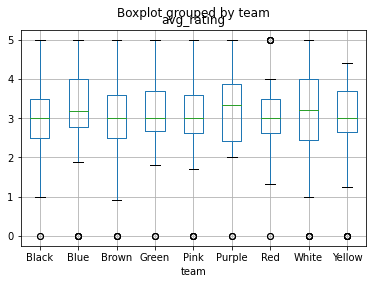

In [10]:
to_plot = team_questions.merge(team_counts[['team', 'user']], on='team', how='inner')
to_plot.boxplot('avg_rating', by='team')